In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

 # Exploring Data

In [2]:
df = pd.read_csv("mcdonalds.csv")
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [3]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
df.shape

(1453, 15)

In [5]:
MD_x = (df.iloc[:, 0:11] == "Yes").astype(int)

In [6]:
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [7]:
column_means = np.round(MD_x.mean(), 2)
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [8]:
from sklearn.decomposition import PCA

# Assuming MD_x is the binary matrix obtained from the previous code
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Print summary
print("Standard deviation of principal components:")
print(np.round(pca.explained_variance_, 2))
print("\nProportion of variance:")
print(np.round(pca.explained_variance_ratio_, 2))
print("\nCumulative proportion of variance:")
print(np.round(np.cumsum(pca.explained_variance_ratio_), 2))


Standard deviation of principal components:
[0.57 0.37 0.25 0.16 0.11 0.1  0.08 0.08 0.07 0.06 0.06]

Proportion of variance:
[0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]

Cumulative proportion of variance:
[0.3  0.49 0.63 0.71 0.77 0.82 0.86 0.9  0.94 0.97 1.  ]


In [9]:
# Assuming MD_pca is the result of PCA as obtained in the previous code

# Set the desired number of digits
np.set_printoptions(precision=1)
# Print the PCA results
print(MD_pca)


[[ 0.4 -0.2  0.7 ...  0.2  0.5 -0.6]
 [-0.2  0.4 -0.7 ...  0.1  0.5 -0.5]
 [ 0.4  0.7 -0.1 ... -0.3  0.1  0.2]
 ...
 [-0.2  1.1  0.2 ...  0.   0.1 -0. ]
 [-1.2 -0.   0.6 ...  0.  -0.  -0.1]
 [ 1.6  0.3 -0.  ... -0.1 -0.4 -0.5]]


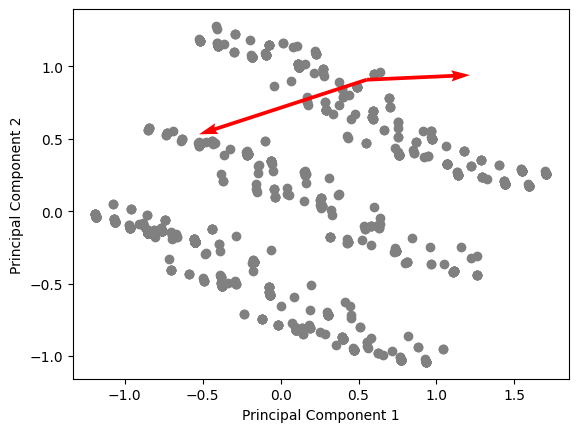

In [10]:
import matplotlib.pyplot as plt
# Get the coordinates of the data points in the principal component space
pca_coordinates = MD_pca[:, :2]

# Plot the points with grey color
plt.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], color='grey')

# Add principal axes to the plot
for length, vector in zip(pca.explained_variance_, pca.components_[:2]):
    v = vector * 3 * np.sqrt(length)
    plt.quiver(pca.mean_[0], pca.mean_[1], v[0], v[1], color='r', scale=1, scale_units='xy')
# Set plot labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()


# Extracting Segments

In [12]:
from sklearn.cluster import KMeans

# Assuming MD_x is the binary matrix obtained from the first part of the code

# Set the random seed for reproducibility
np.random.seed(1234)

# Perform model selection for the number of clusters
best_inertia = float('inf')
best_kmeans_model = None
best_num_clusters = 0

for num_clusters in range(2, 9):
    # Run KMeans with 10 repetitions
    inertias = []
    for _ in range(10):
        kmeans = KMeans(n_clusters=num_clusters, n_init=1).fit(MD_x)
        inertias.append(kmeans.inertia_)

    # Average inertia over 10 repetitions
    avg_inertia = np.mean(inertias)

    # Update if current number of clusters is better
    if avg_inertia < best_inertia:
        best_inertia = avg_inertia
        best_num_clusters = num_clusters
        best_kmeans_model = kmeans

# Print the best number of clusters
print("Best number of clusters:", best_num_clusters)

# Relabel the clusters
cluster_labels = best_kmeans_model.predict(MD_x)
# Assuming MD_x is a DataFrame, you can add the cluster labels as a new column
MD_x['Cluster'] = cluster_labels


Best number of clusters: 8


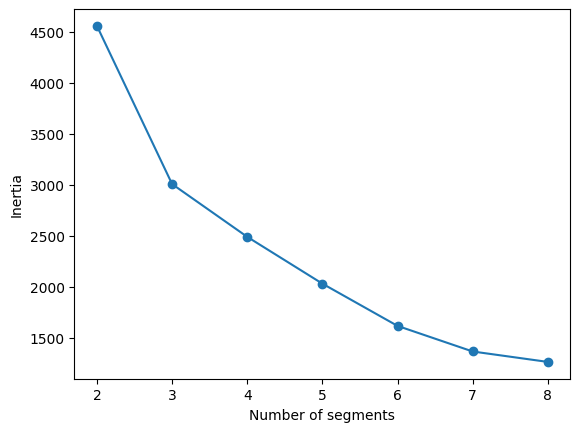

In [13]:
import matplotlib.pyplot as plt

# Assuming MD_x is the binary matrix and best_kmeans_model is obtained from the previous code

# Plot the k-means clustering results
plt.plot(range(2, 9), [KMeans(n_clusters=i, n_init=10).fit(MD_x).inertia_ for i in range(2, 9)], marker='o')

# Set plot labels
plt.xlabel('Number of segments')
plt.ylabel('Inertia')

# Show the plot
plt.show()


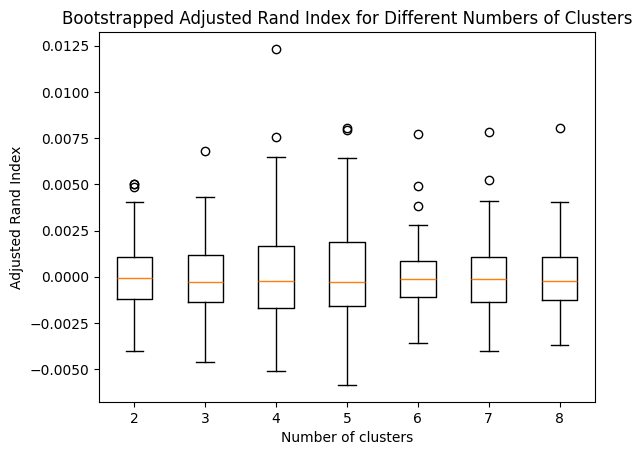

In [15]:
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Assuming MD_x is the binary matrix obtained from the first part of the code

# Set the random seed for reproducibility
np.random.seed(1234)

# Number of bootstrap samples
nboot = 100

# Number of clusters to consider
cluster_range = range(2, 9)

# Bootstrap loop
boot_ari = []

for _ in range(nboot):
    # Resample with replacement
    resampled_data = resample(MD_x)

    # Perform KMeans for different numbers of clusters
    cluster_labels = [KMeans(n_clusters=num_clusters, n_init=10).fit(resampled_data).labels_ for num_clusters in cluster_range]

    # Calculate adjusted Rand index for each clustering result
    ari_values = [adjusted_rand_score(MD_x['Cluster'], labels) for labels in cluster_labels]

    # Append the result to boot_ari
    boot_ari.append(ari_values)

# Convert the list to a NumPy array
boot_ari = np.array(boot_ari)

# Plot the bootstrapped results
plt.boxplot(boot_ari, labels=cluster_range)
plt.xlabel('Number of clusters')
plt.ylabel('Adjusted Rand Index')
plt.title('Bootstrapped Adjusted Rand Index for Different Numbers of Clusters')
plt.show()


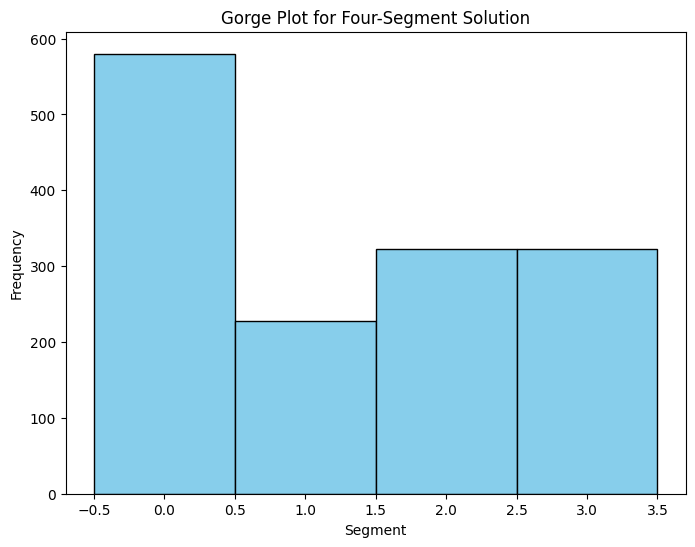

In [21]:
from sklearn.cluster import KMeans
MD_kmeans = KMeans(n_clusters=4, random_state=1234).fit(MD_pca)

# Gorge plot for the four-segment solution
plt.figure(figsize=(8, 6))
plt.hist(MD_kmeans.labels_, bins=np.arange(5)-0.5, edgecolor='black', color='skyblue')
plt.xlabel('Segment')
plt.ylabel('Frequency')
plt.title('Gorge Plot for Four-Segment Solution')
plt.show()

# Using Mixtures of Distributions

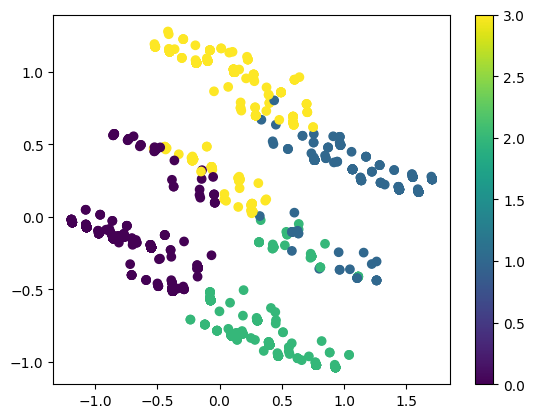

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming new_df_scaled is your scaled data
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_pca)

# Assuming MD_kmeans.labels_ is the cluster labels from KMeans
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_kmeans.labels_, cmap="viridis")
plt.colorbar()
plt.show()

# Using Mixtures of Regression Models

                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.527e+32
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:36:26   Log-Likelihood:                 46437.
No. Observations:                1453   AIC:                        -9.285e+04
Df Residuals:                    1441   BIC:                        -9.279e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           2.08e-15    4.7e-1

<Figure size 1000x600 with 0 Axes>

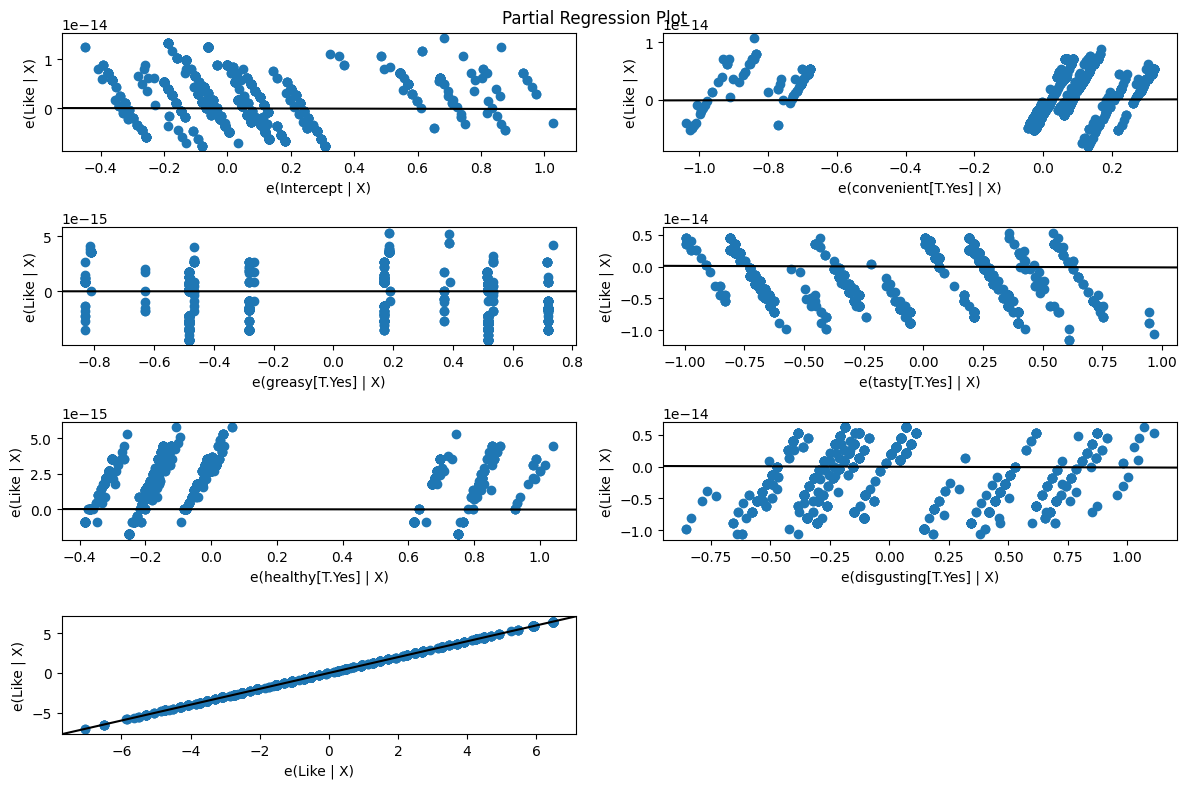

In [33]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Assuming mcdonalds is a DataFrame containing the data
# Assuming the dependent variable is 'Like' and independent variables are columns 1 to 11
# Adjust the column names accordingly

# Reverse the levels of 'Like' variable
df['Like'] = pd.Categorical(df['Like']).codes
df['Like'] = 6 - df['Like']

# Create a formula for regression
formula = 'Like ~ ' + ' + '.join(df.columns[1:12])

# Fit a linear regression model
model = sm.OLS.from_formula(formula, data=df)
result = model.fit()

# Print the model summary
print(result.summary())

# Perform stepwise regression (forward selection) using AIC
selected_features = []
aic_values = []

for feature in df.columns[1:12]:
    model = sm.OLS.from_formula('Like ~ ' + ' + '.join(selected_features + [feature]), data=df)
    result = model.fit()
    aic_values.append(result.aic)
    if result.aic == min(aic_values):
        selected_features.append(feature)

# Print the selected features
print("Selected features:", selected_features)

# Refit the model with selected features
final_model = sm.OLS.from_formula('Like ~ ' + ' + '.join(selected_features), data=df)
final_result = final_model.fit()

# Print the refitted model summary
print(final_result.summary())

# Plot the significance of coefficients
plt.figure(figsize=(10, 6))
sm.graphics.plot_partregress_grid(final_result, fig=plt.figure(figsize=(12, 8)))
plt.show()


#  Describing Segments

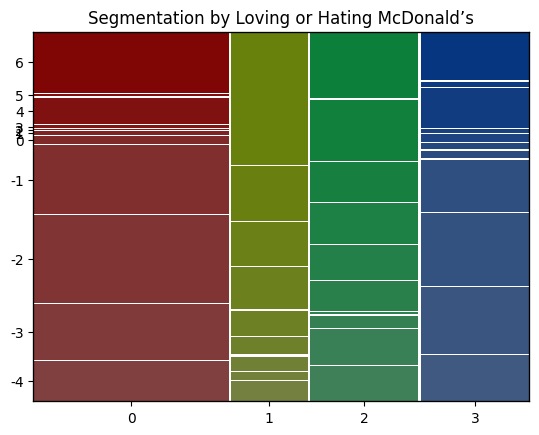

In [35]:
from statsmodels.graphics.mosaicplot import mosaic
MD_k4 = MD_kmeans.labels_
df_mosaic = pd.DataFrame({'Segment': MD_k4, 'Like': df['Like']})
ct = pd.crosstab(df_mosaic['Segment'], df_mosaic['Like'])
mosaic(ct.stack(), title='Segmentation by Loving or Hating McDonald’s', labelizer=lambda x: '')
plt.show()

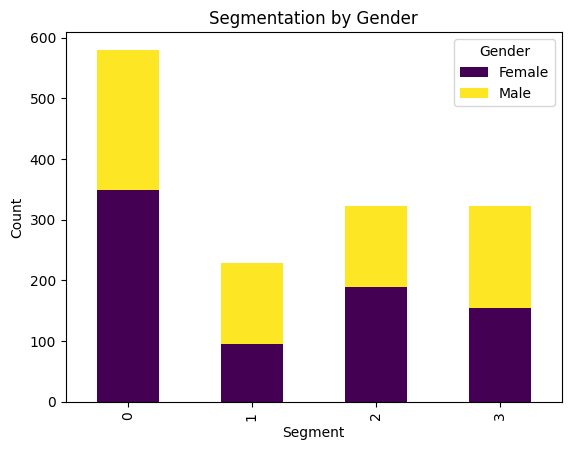

In [40]:
df_gender = pd.DataFrame({'Segment': MD_k4, 'Gender': df['Gender']})
ct_gender = pd.crosstab(df_gender['Segment'], df_gender['Gender'])

ct_gender.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Segmentation by Gender')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()